In [1]:
import netCDF4 as nc
import xarray as xr
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [ ]:
###
## for lon and lat range:
## 113 - 114 deg E;
## 22.25 - 23.25 N

In [2]:
year = range(2014,2021)
year

range(2014, 2021)

In [3]:
'''
NOx; NH3; CO; OC; SO2;
BC;
'''

# NOx_agriculture  = 0 

## seems data for 2020-02 has something abnormal

'\nNOx; NH3; CO; OC; SO2;\nBC;\n'

In [4]:
# file = '2019/MEIC_NOx_2019_025x025.nc'

# dataset = nc.Dataset(file)
# dataset

In [5]:
file = '/Users/hrd/Documents/MEIC/2020/MEIC_NOx_2020_025x025.nc'

In [6]:
## read in data for NOx from 2014 to 2020

NOx = []
for i in year:
    #print(i)
    dataset = xr.open_dataset(str(i)+'/MEIC_NOx_'+str(i)+'_025x025.nc')
    NOx.append(dataset)

In [7]:
## read in data for NH3 from 2014 to 2020

NH3 = []
for i in year:
    #print(i)
    dataset = xr.open_dataset(str(i)+'/MEIC_NH3_'+str(i)+'_025x025.nc')
    NH3.append(dataset)

In [8]:
## read in data for SO2 from 2014 to 2020

SO2 = []
for i in year:
    #print(i)
    dataset = xr.open_dataset(str(i)+'/MEIC_SO2_'+str(i)+'_025x025.nc')
    SO2.append(dataset)

In [54]:
## read in data for SO2 from 2014 to 2020

CO = []
for i in year:
    #print(i)
    dataset = xr.open_dataset(str(i)+'/MEIC_CO_'+str(i)+'_025x025.nc')
    CO.append(dataset)

In [9]:
type(dataset)

xarray.core.dataset.Dataset

In [10]:
# variable_data = dataset.variables['NOx_industry'][:]
# print(variable_data)

In [11]:
NOx[1]

<xarray.Dataset>
Dimensions:             (time: 12, lon: 320, lat: 200)
Coordinates:
  * time                (time) datetime64[ns] 2015-01-01 ... 2015-12-01
  * lon                 (lon) float64 70.12 70.38 70.62 ... 149.4 149.6 149.9
  * lat                 (lat) float64 10.12 10.38 10.62 ... 59.38 59.62 59.88
Data variables:
    NOx_agriculture     (time, lat, lon) float32 ...
    NOx_industry        (time, lat, lon) float32 ...
    NOx_power           (time, lat, lon) float32 ...
    NOx_residential     (time, lat, lon) float32 ...
    NOx_transportation  (time, lat, lon) float32 ...
Attributes:
    long_name:  NOx agriculture
    units:      kg/m2/s

In [12]:
no = NOx[1]['NOx_industry']

In [13]:
type(no)

xarray.core.dataarray.DataArray

AttributeError: Rectangle.set() got an unexpected keyword argument 'add_colobar'

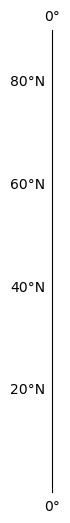

In [14]:


# Set up the plot with Cartopy
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Plot the NOx data
no.plot(ax=ax, transform=ccrs.PlateCarree(), add_colobar = True, cmap='viridis', cbar_kwargs={'label': 'NOx Concentration'})

# Set title
plt.title('NOx Concentration Map')
plt.show()

In [22]:
data = NOx[0].NOx_industry
print(data.dims) 
selected_data = data.sel(lat=22.5, lon=113.5, method='nearest')
selected_data

('time', 'lat', 'lon')


<xarray.DataArray 'NOx_industry' (time: 12)>
[12 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2014-12-01
    lon      float64 113.6
    lat      float64 22.62
Attributes:
    long_name:  NOx industry
    units:      kg/m2/s

In [20]:
industry = NOx[1].NOx_industry

In [21]:
float(industry['lon'][0])

70.125

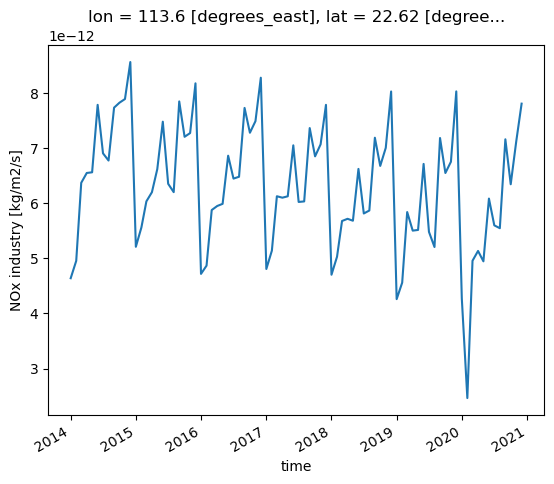

In [25]:
ar = []
for i in range(len(NOx)):
    # ar.append(NOx[i].NOx_industry.isel(lat=60, lon=160))
    ar.append(NOx[i].NOx_industry.sel(lat=22.5, lon=113.5, method='nearest'))

ar = xr.concat(ar, dim='time')
ar.plot()
#(ar==0)

In [18]:
# industry = NOx[0].NOx_industry
# ar = industry.isel(lat = 10, lon=10)

# ar.plot()


Text(0.5, 1.0, 'NOx_residential')

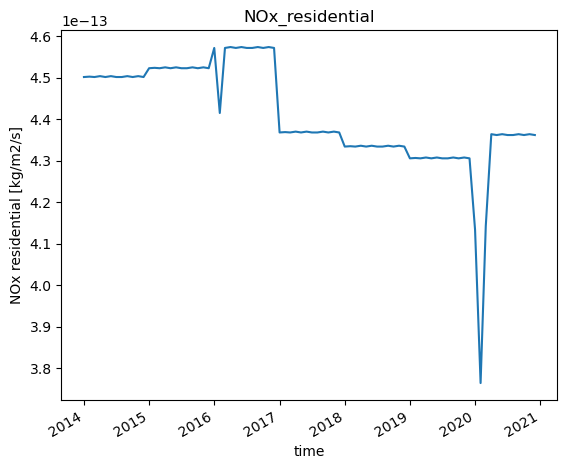

In [37]:
res = []
for i in range(len(NOx)):
    res.append(NOx[i].NOx_residential.sel(lat=22.5, lon=113.5, method='nearest'))

res = xr.concat(res, dim='time')
res.plot()
#(agri==0)
plt.title('NOx_residential')

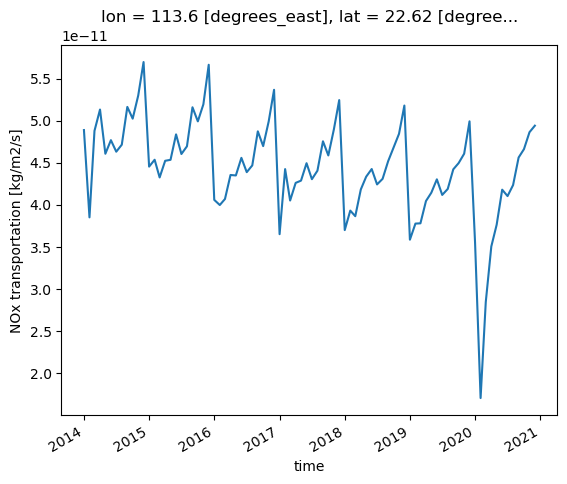

In [39]:
trans= []
for i in range(len(NOx)):
    trans.append(NOx[i].NOx_transportation.sel(lat=22.5, lon=113.5, method='nearest'))

trans = xr.concat(trans, dim='time')
trans.plot()
#(agri==0)
#plt.title('NOx_residential')

In [42]:
#### raw conclusion at first seen

## seems the average is getting lower as lon and lat gets larger




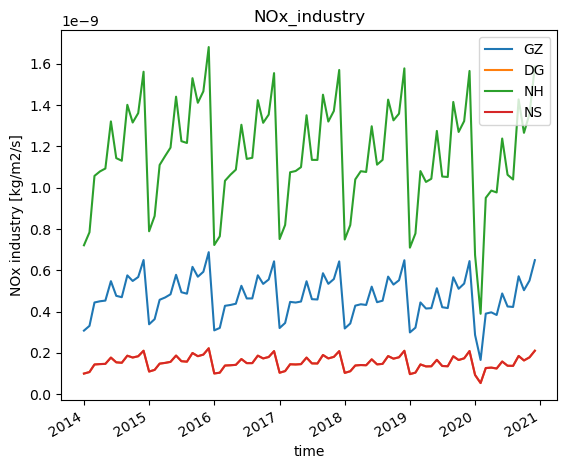

In [122]:
a = []
b = []
c = []
d = []
for i in range(len(NOx)):
    a.append(NOx[i].NOx_industry.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(NOx[i].NOx_industry.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(NOx[i].NOx_industry.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(NOx[i].NOx_industry.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

a = xr.concat(a, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')


''' data here is 0'''

a.plot(label='GZ')
b.plot(label='DG')
c.plot(label='NH')
d.plot(label='NS')       # b = d
plt.title('NOx_industry')
plt.legend()
#(ar==0)

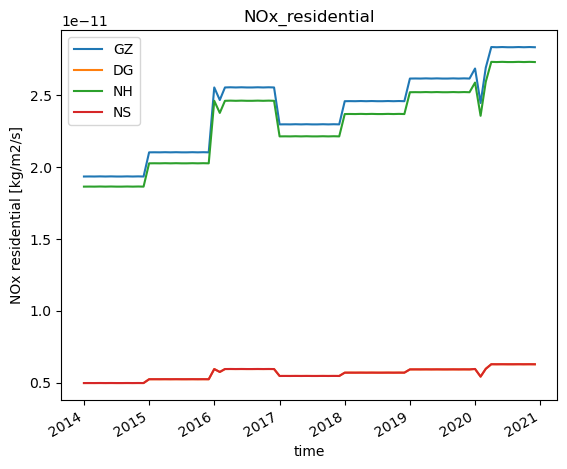

In [123]:
a = []
b = []
c = []
d = []
for i in range(len(NOx)):
    a.append(NOx[i].NOx_residential.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(NOx[i].NOx_residential.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(NOx[i].NOx_residential.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(NOx[i].NOx_residential.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

a = xr.concat(a, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')


''' data here is 0'''

a.plot(label='GZ')
b.plot(label='DG')
c.plot(label='NH')
d.plot(label='NS')       # b = d
plt.title('NOx_residential')
plt.legend()
#(ar==0)

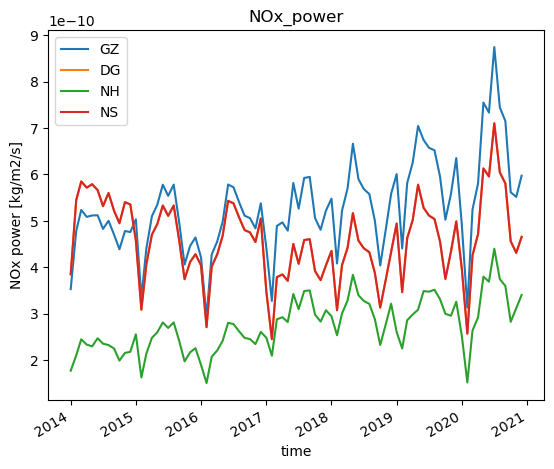

In [124]:
a = []
b = []
c = []
d = []
for i in range(len(NOx)):
    a.append(NOx[i].NOx_power.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(NOx[i].NOx_power.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(NOx[i].NOx_power.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(NOx[i].NOx_power.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

a = xr.concat(a, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')


''' data here is 0'''

a.plot(label='GZ')
b.plot(label='DG')
c.plot(label='NH')
d.plot(label='NS')       # b = d
plt.title('NOx_power')
plt.legend()
#(a==0)

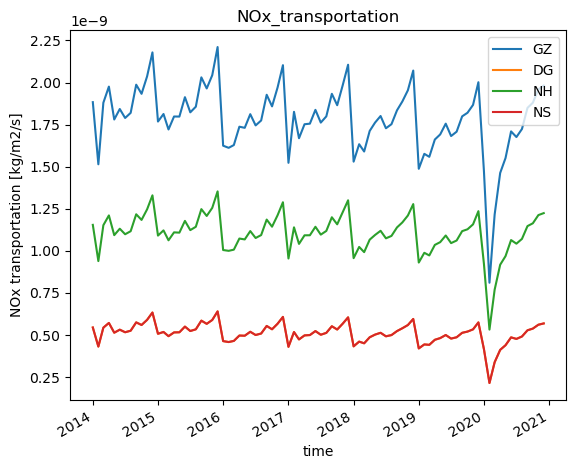

In [125]:
a = []
b = []
c = []
d = []
for i in range(len(NOx)):
    a.append(NOx[i].NOx_transportation.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(NOx[i].NOx_transportation.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(NOx[i].NOx_transportation.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(NOx[i].NOx_transportation.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

a = xr.concat(a, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')


''' data here is 0'''

a.plot(label='GZ')
b.plot(label='DG')
c.plot(label='NH')
d.plot(label='NS')       # b = d
plt.title('NOx_transportation')
plt.legend()
#(ar==0)

In [45]:
NOx[-1]

<xarray.Dataset>
Dimensions:             (time: 12, lon: 320, lat: 200)
Coordinates:
  * time                (time) datetime64[ns] 2020-01-01 ... 2020-12-01
  * lon                 (lon) float64 70.12 70.38 70.62 ... 149.4 149.6 149.9
  * lat                 (lat) float64 10.12 10.38 10.62 ... 59.38 59.62 59.88
Data variables:
    NOx_agriculture     (time, lat, lon) float32 ...
    NOx_industry        (time, lat, lon) float32 ...
    NOx_power           (time, lat, lon) float32 ...
    NOx_residential     (time, lat, lon) float32 ...
    NOx_transportation  (time, lat, lon) float32 ...
Attributes:
    long_name:  NOx agriculture
    units:      kg/m2/s

In [61]:
a = NH3[0].NH3_agriculture.sel(lat=22.5, lon=113.5, method='nearest')
(a==0)

<xarray.DataArray 'NH3_agriculture' (time: 12)>
array([False, False, False, False, False, False, False, False, False,
       False, False, False])
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2014-12-01
    lon      float64 113.6
    lat      float64 22.62

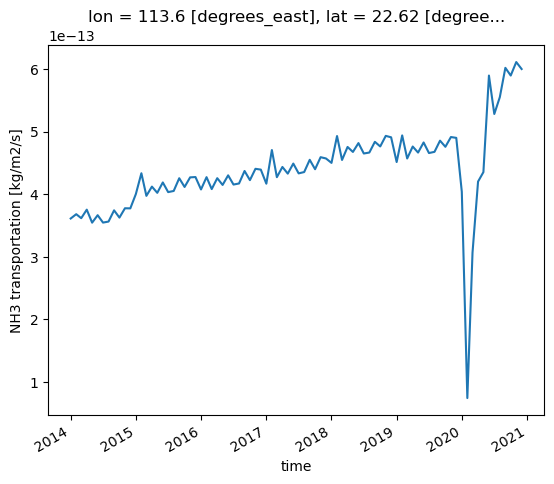

In [75]:
ar = []
for i in range(len(NH3)):
    # ar.append(NOx[i].NOx_industry.isel(lat=60, lon=160))
    ar.append(NH3[i].NH3_transportation.sel(lat=22.5, lon=113.5, method='nearest'))

ar = xr.concat(ar, dim='time')
ar.plot()
#(ar==0)

<xarray.DataArray 'NH3_industry' (time: 84)>
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2020-12-01
    lon      float64 113.6
    lat      float64 22.62

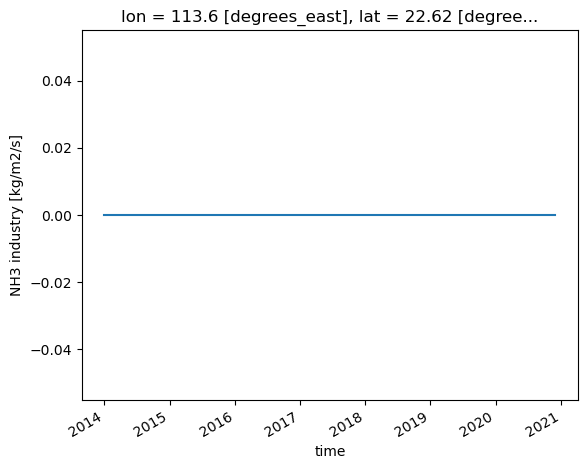

In [77]:
ar = []
for i in range(len(NH3)):
    # ar.append(NOx[i].NOx_industry.isel(lat=60, lon=160))
    ar.append(NH3[i].NH3_industry.sel(lat=22.5, lon=113.5, method='nearest'))

ar = xr.concat(ar, dim='time')
ar.plot()
(ar==0)

#### plot timely change for the available species 
#### plot the all dots near the sites available

In [ ]:
# lat:
#    22.125, 22.375, 22.625, 22.875, 23.125

# lon:
#    113.125, 113.375, 113.625, 113.875

'''
GZ, urban,      23.16; 113.27
DG, outskirt,   22.95, 113.738
NH, industrial, 23.046, 113.144
NS, suburban,   22.755, 113.5
'''

In [96]:
#ar   113.4, 23.12
#b    113.6, 22.88
#c    113.1, 23.12
#d     = b

Text(0.5, 1.0, 'NH3_transportation')

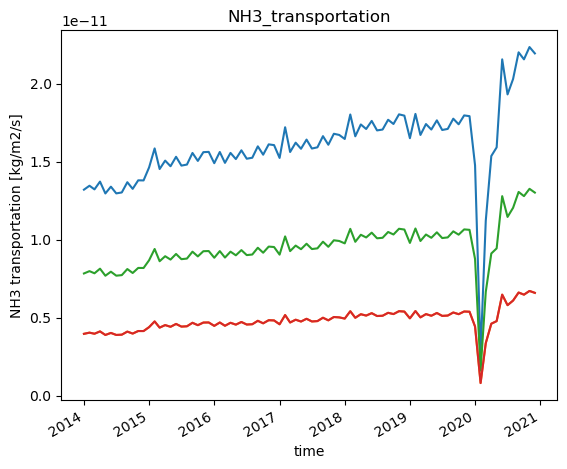

In [98]:
ar = []
b = []
c = []
d = []
for i in range(len(NH3)):
    # ar.append(NOx[i].NOx_industry.isel(lat=60, lon=160))
    ar.append(NH3[i].NH3_transportation.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(NH3[i].NH3_transportation.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(NH3[i].NH3_transportation.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(NH3[i].NH3_transportation.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

ar = xr.concat(ar, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')

ar.plot()
b.plot()
c.plot()
d.plot()      # b = d
#(ar==0)
plt.title('NH3_transportation')

Text(0.5, 1.0, 'NH3_industry')

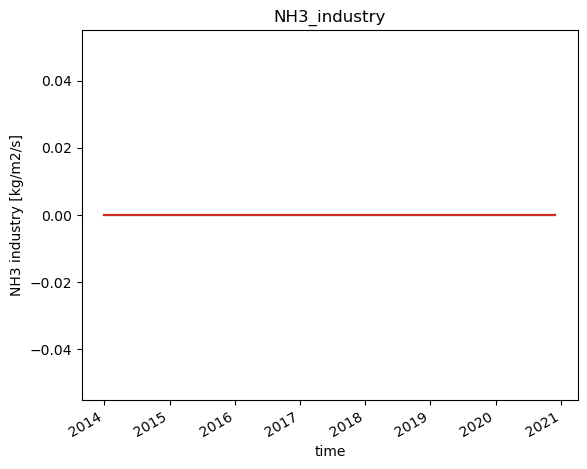

In [100]:
a = []
b = []
c = []
d = []
for i in range(len(NH3)):
    # ar.append(NOx[i].NOx_industry.isel(lat=60, lon=160))
    a.append(NH3[i].NH3_industry.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(NH3[i].NH3_industry.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(NH3[i].NH3_industry.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(NH3[i].NH3_industry.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

a = xr.concat(a, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')


''' data here is 0'''

# a.plot()
# b.plot()
# c.plot()
# d.plot()      # b = d
# #(ar==0)
# plt.title('NH3_industry')

In [103]:
a = []
b = []
c = []
d = []
for i in range(len(NH3)):
    # ar.append(NOx[i].NOx_industry.isel(lat=60, lon=160))
    a.append(NH3[i].NH3_power.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(NH3[i].NH3_power.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(NH3[i].NH3_power.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(NH3[i].NH3_power.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

a = xr.concat(a, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')


''' data here is 0'''

# a.plot()
# b.plot()
# c.plot()
# d.plot()      # b = d
# plt.title('NH3_power')
#(ar==0)


' data here is 0'

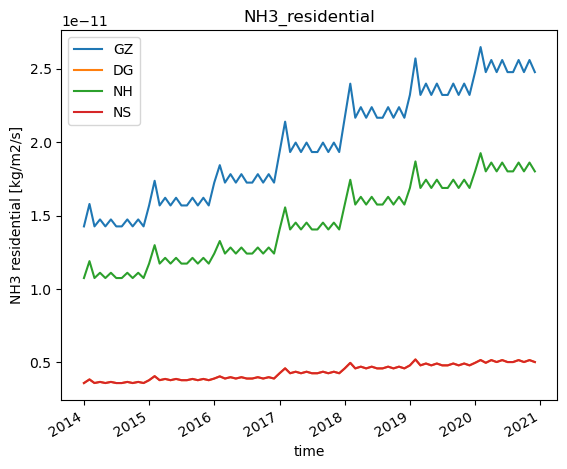

In [109]:
a = []
b = []
c = []
d = []
for i in range(len(NH3)):
    # ar.append(NOx[i].NOx_industry.isel(lat=60, lon=160))
    a.append(NH3[i].NH3_residential.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(NH3[i].NH3_residential.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(NH3[i].NH3_residential.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(NH3[i].NH3_residential.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

a = xr.concat(a, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')


''' data here is 0'''

a.plot(label='GZ')
b.plot(label='DG')
c.plot(label='NH')
d.plot(label='NS')       # b = d
plt.title('NH3_residential')
plt.legend()
#(ar==0)

#  b is significantly lower

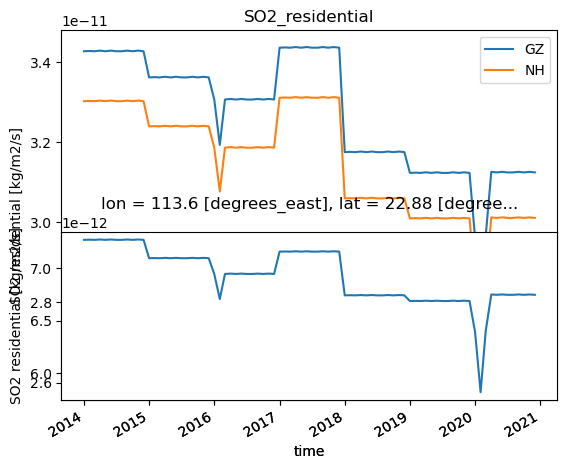

In [118]:
a = []
b = []
c = []
d = []
for i in range(len(NH3)):
    # ar.append(NOx[i].NOx_industry.isel(lat=60, lon=160))
    a.append(SO2[i].SO2_residential.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(SO2[i].SO2_residential.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(SO2[i].SO2_residential.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(SO2[i].SO2_residential.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

a = xr.concat(a, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')


''' data here is 0'''

a.plot(label='GZ')
#b.plot(label='DG')
c.plot(label='NH')
#d.plot(label='NS')       # b = d
plt.title('SO2_residential')
plt.legend()
#(ar==0)

plt.subplot(2,1,2)
b.plot()

# DG (b) and NS (d) are significantly lower

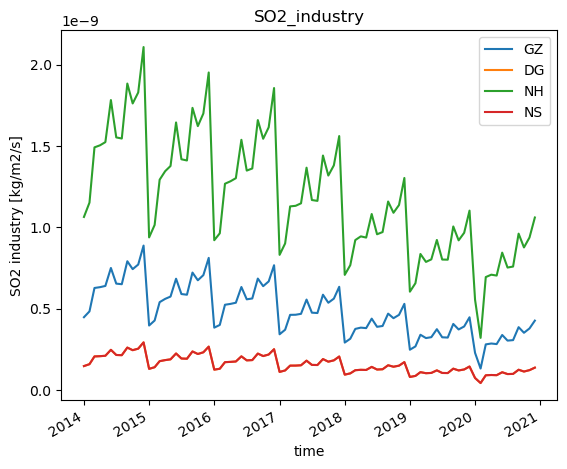

In [116]:
a = []
b = []
c = []
d = []
for i in range(len(NH3)):
    a.append(SO2[i].SO2_industry.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(SO2[i].SO2_industry.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(SO2[i].SO2_industry.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(SO2[i].SO2_industry.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

a = xr.concat(a, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')


''' data here is 0'''

a.plot(label='GZ')
b.plot(label='DG')
c.plot(label='NH')
d.plot(label='NS')       # b = d
plt.title('SO2_industry')
plt.legend()
#(ar==0)



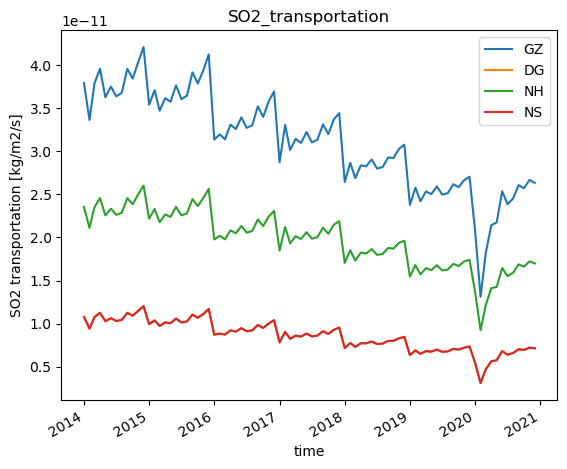

In [119]:
a = []
b = []
c = []
d = []
for i in range(len(NH3)):
    a.append(SO2[i].SO2_transportation.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(SO2[i].SO2_transportation.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(SO2[i].SO2_transportation.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(SO2[i].SO2_transportation.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

a = xr.concat(a, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')


''' data here is 0'''

a.plot(label='GZ')
b.plot(label='DG')
c.plot(label='NH')
d.plot(label='NS')       # b = d
plt.title('SO2_transportation')
plt.legend()
#(ar==0)

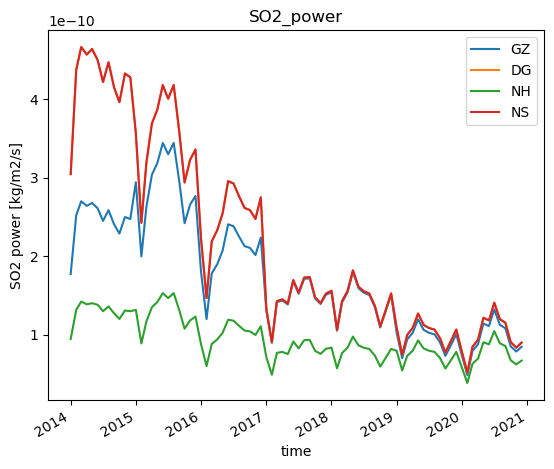

In [120]:
a = []
b = []
c = []
d = []
for i in range(len(NH3)):
    a.append(SO2[i].SO2_power.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(SO2[i].SO2_power.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(SO2[i].SO2_power.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(SO2[i].SO2_power.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

a = xr.concat(a, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')


''' data here is 0'''

a.plot(label='GZ')
b.plot(label='DG')
c.plot(label='NH')
d.plot(label='NS')       # b = d
plt.title('SO2_power')
plt.legend()
#(ar==0)

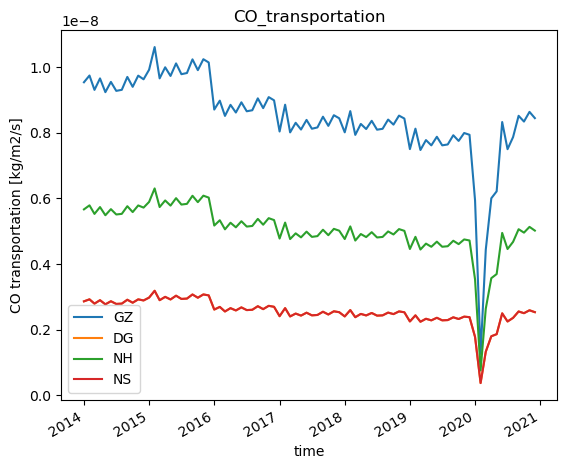

In [126]:
a = []
b = []
c = []
d = []
for i in range(len(CO)):
    a.append(CO[i].CO_transportation.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(CO[i].CO_transportation.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(CO[i].CO_transportation.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(CO[i].CO_transportation.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

a = xr.concat(a, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')


''' data here is 0'''

a.plot(label='GZ')
b.plot(label='DG')
c.plot(label='NH')
d.plot(label='NS')       # b = d
plt.title('CO_transportation')
plt.legend()
#(ar==0)

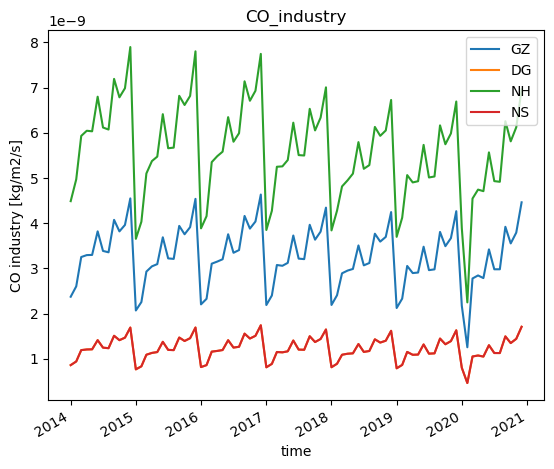

In [127]:
a = []
b = []
c = []
d = []
for i in range(len(CO)):
    a.append(CO[i].CO_industry.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(CO[i].CO_industry.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(CO[i].CO_industry.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(CO[i].CO_industry.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

a = xr.concat(a, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')

a.plot(label='GZ')
b.plot(label='DG')
c.plot(label='NH')
d.plot(label='NS')       # b = d
plt.title('CO_industry')
plt.legend()
#(ar==0)

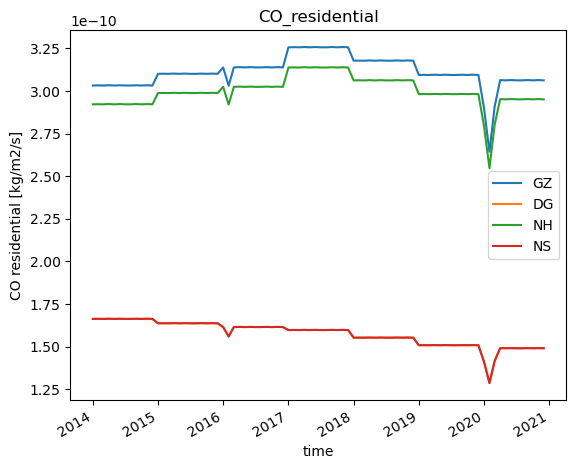

In [128]:
a = []
b = []
c = []
d = []
for i in range(len(CO)):
    a.append(CO[i].CO_residential.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(CO[i].CO_residential.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(CO[i].CO_residential.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(CO[i].CO_residential.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

a = xr.concat(a, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')

a.plot(label='GZ')
b.plot(label='DG')
c.plot(label='NH')
d.plot(label='NS')       # b = d
plt.title('CO_residential')
plt.legend()
#(ar==0)

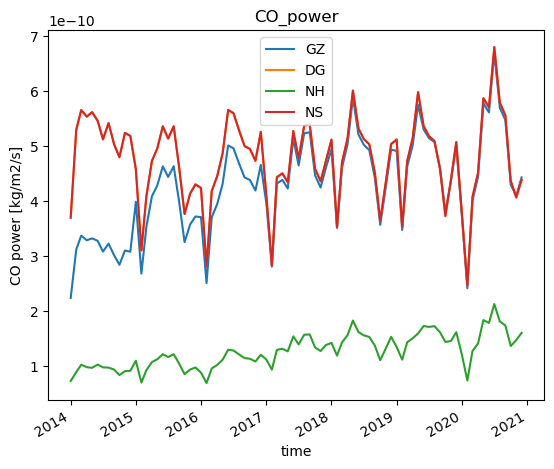

In [129]:
a = []
b = []
c = []
d = []
for i in range(len(CO)):
    a.append(CO[i].CO_power.sel(lat=23.16, lon=113.27, method='nearest'))   #GZ
    b.append(CO[i].CO_power.sel(lat=22.95, lon=113.74, method='nearest'))    #DG
    c.append(CO[i].CO_power.sel(lat=23.04, lon=113.14, method='nearest'))    #NH
    d.append(CO[i].CO_power.sel(lat=22.755, lon=113.5, method='nearest'))    #NS

a = xr.concat(a, dim='time')
b = xr.concat(b, dim='time')
c = xr.concat(c, dim='time')
d = xr.concat(d, dim='time')

a.plot(label='GZ')
b.plot(label='DG')
c.plot(label='NH')
d.plot(label='NS')       # b = d
plt.title('CO_power')
plt.legend()
#(ar==0)